<a href="https://colab.research.google.com/github/eejyoo/2022-1-python/blob/main/5_2_(%EB%B0%9C%ED%91%9C)%EA%B5%90%EC%B0%A8_%EA%B2%80%EC%A6%9D%EA%B3%BC_%EA%B7%B8%EB%A6%AC%EB%93%9C_%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

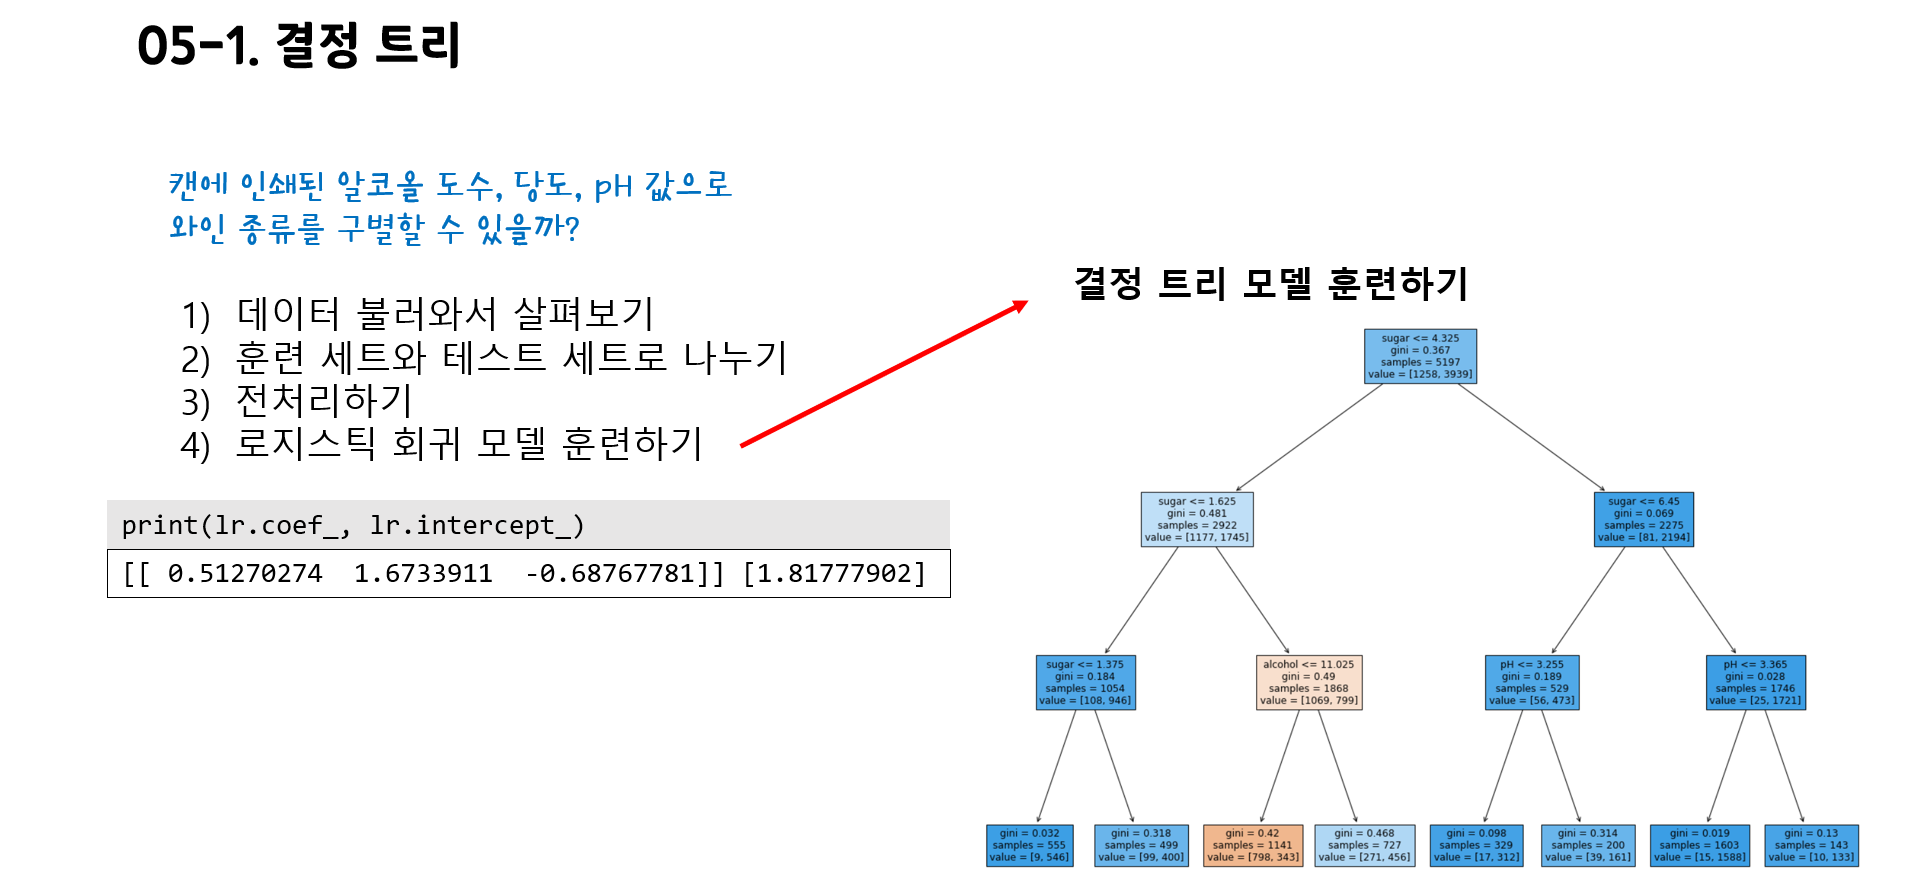

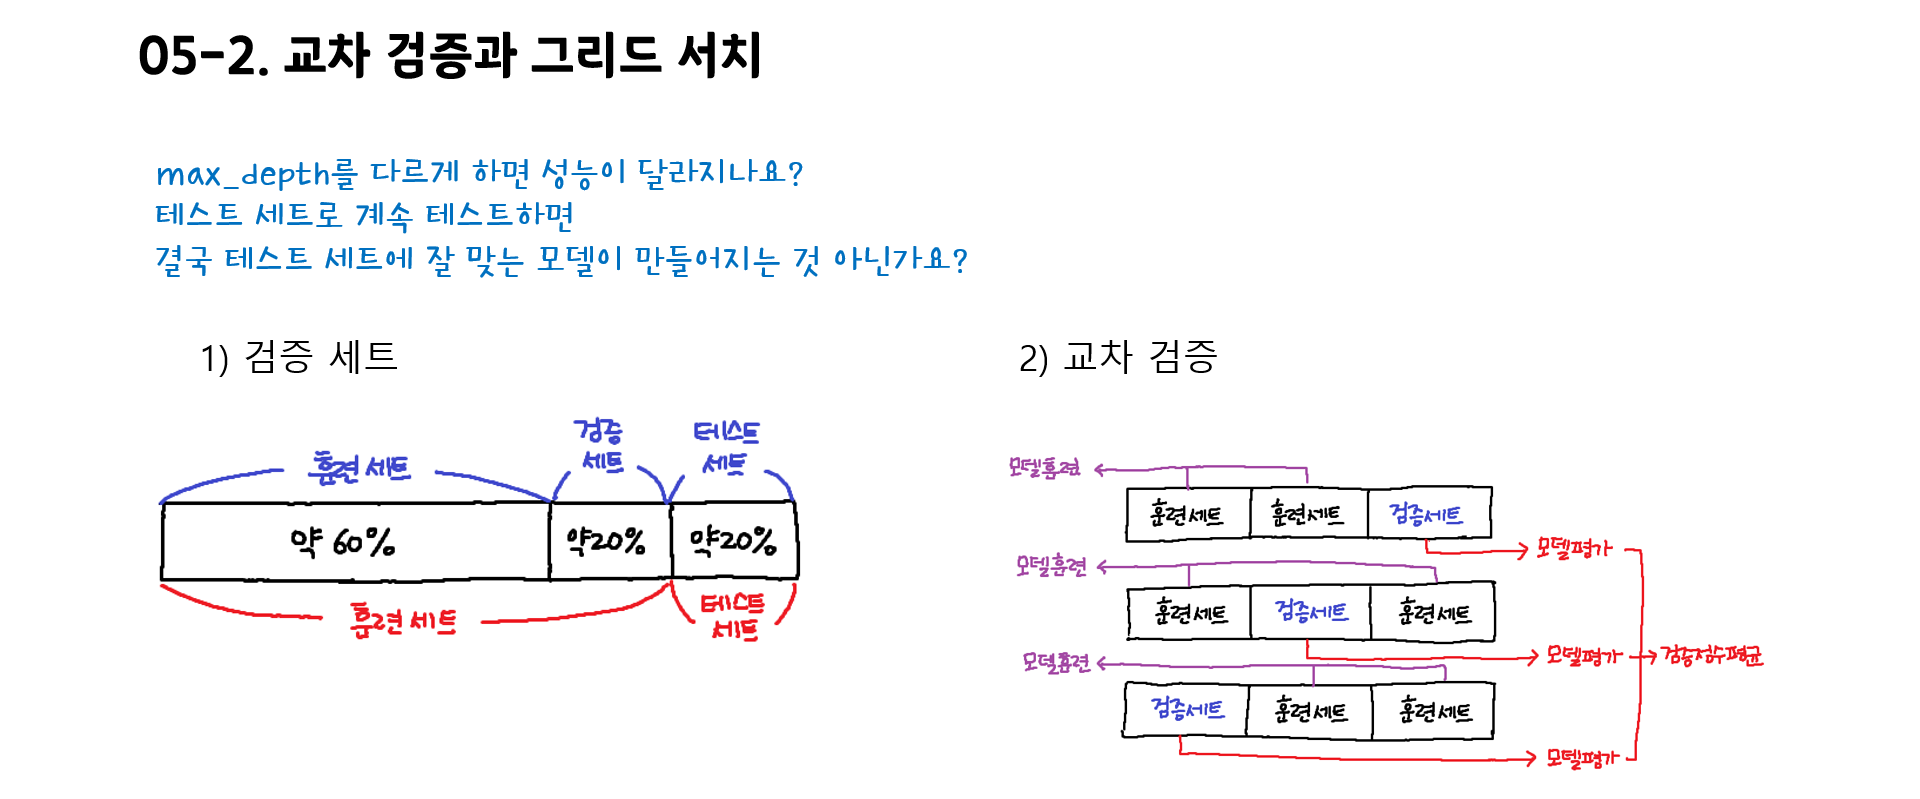

#1. 검증 세트

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
  train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
sub_input, val_input, sub_target, val_target =\
  train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

#2. 교차 검증

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
scores = cross_validate(dt, train_input, train_target)
scores

In [ ]:
import numpy as np
print(np.mean(scores['test_score']))

In [ ]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))                

In [ ]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

** 예시

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
iris

In [ ]:
model = DecisionTreeClassifier(random_state=42)

scores = cross_validate(model, iris.data, iris.target)
print(scores)

In [ ]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(model, iris.data, iris.target, cv=StratifiedKFold())
print(scores)

# 참고

** KNeighborsClassifier 교차 검증(02-2)




In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =\
  train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(kn, train_scaled, train_target)
print(scores)

** LinearRegression 교차 검증(03-3)

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =\
  train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

scores = cross_validate(lr, train_poly, train_target, cv=KFold())
print(np.mean(scores['test_score']))

* KFold, StratifiedKFold 차이<br>
https://steadiness-193.tistory.com/287

** LogisticRegression 교차 검증(04-1)

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =\
  train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import numpy as np

scores = cross_validate(lr, train_scaled, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

** SGDClassifier 교차 검증(04-2)

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =\
  train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import numpy as np

scores = cross_validate(sc, train_scaled, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

#3. 하이퍼파라미터 튜닝

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
  train_test_split(data, target, test_size=0.2, random_state=42)

** 그리드 서치

* 참고 : [싸이킷런 API reference](https://scikit-learn.org/stable/modules/classes.html)<br>
GridSearchCV<br>
DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

gs.fit(train_input, train_target)

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

In [ ]:
print(gs.best_params_)
print(gs.cv_results_['mean_test_score'])

In [ ]:
import numpy as np

best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)
dt = gs.best_estimator_

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 30))
plot_tree(dt)
plt.show()

** 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

In [ ]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 30))
plot_tree(dt)
plt.show()

# 모델 중심에서 데이터 중심으로

https://jiho-ml.com/weekly-nlp-35/